In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
cities = pd.read_csv("cities.csv")
cities

,Latitude,Longitude
0,0.014075,0.420855
1,0.548960,0.732291
2,0.103348,0.219653
3,0.133048,0.332002
4,0.544966,0.123442
5,0.240008,0.084916
6,0.423415,0.961420
7,0.977754,0.962234
8,0.171691,0.303340
9,0.847239,0.241638


In [3]:
cities = np.array(cities)
cities

array([[0.01407456, 0.42085537],
       [0.54896049, 0.73229088],
       [0.10334847, 0.21965304],
       [0.13304831, 0.33200241],
       [0.5449663 , 0.12344168],
       [0.24000782, 0.08491589],
       [0.42341504, 0.9614197 ],
       [0.97775389, 0.96223419],
       [0.17169133, 0.30333956],
       [0.84723906, 0.24163755]])

Text(0, 0.5, 'Longitude')

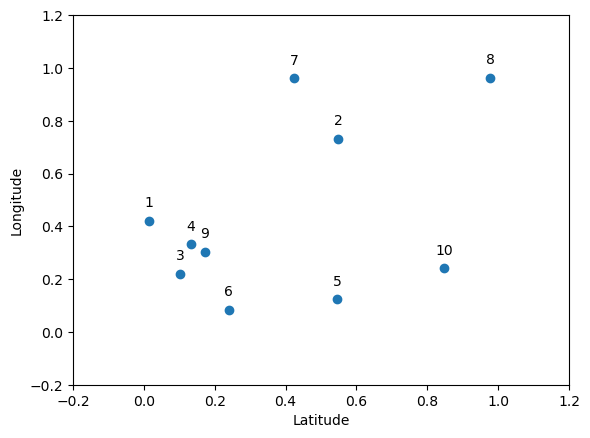

In [4]:
plt.scatter(cities[:,0], cities[:,1])
for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
    plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [5]:
# Calculate the distance matrix between cities
def calculate_distance_matrix(cities):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = np.linalg.norm(cities[i] - cities[j])
    return distance_matrix

In [6]:
distance_matrix = calculate_distance_matrix(cities)
distance_matrix

array([[0.        , 0.61894672, 0.22011862, 0.14849108, 0.60852357,
        0.4048471 , 0.67806299, 1.10533655, 0.19660369, 0.85222186],
       [0.61894672, 0.        , 0.67924048, 0.57724675, 0.6088623 ,
        0.71731871, 0.26126936, 0.48655699, 0.57125411, 0.57420448],
       [0.22011862, 0.67924048, 0.        , 0.1162087 , 0.4519767 ,
        0.19191112, 0.807874  , 1.14717549, 0.10804712, 0.74421538],
       [0.14849108, 0.57724675, 0.1162087 , 0.        , 0.46170771,
        0.26924354, 0.6931659 , 1.05390684, 0.0481128 , 0.71988488],
       [0.60852357, 0.6088623 , 0.4519767 , 0.46170771, 0.        ,
        0.30738236, 0.84674782, 0.94386332, 0.41436391, 0.32455983],
       [0.4048471 , 0.71731871, 0.19191112, 0.26924354, 0.30738236,
        0.        , 0.8954871 , 1.14627949, 0.22885813, 0.62712954],
       [0.67806299, 0.26126936, 0.807874  , 0.6931659 , 0.84674782,
        0.8954871 , 0.        , 0.55433945, 0.70458094, 0.83529225],
       [1.10533655, 0.48655699, 1.1471754

Text(0, 0.5, 'Longitude')

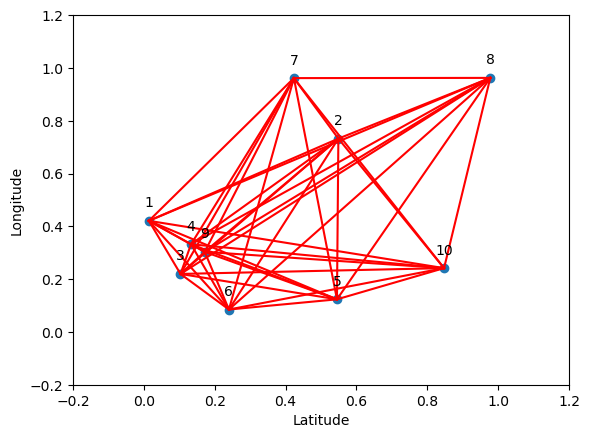

In [7]:
plt.scatter(cities[:,0], cities[:,1])
for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
    plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        plt.plot([cities[i,0], cities[j,0]], [cities[i,1], cities[j,1]], color='red')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [8]:
origin_city = 3
destination_city = 3

In [9]:
def plot_origin_desitination(cities, origin_city, destination_city):
    plt.scatter(cities[:,0], cities[:,1])
    for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
        plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
    if origin_city != destination_city:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
        plt.scatter(cities[destination_city-1,0], cities[destination_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Destination", (cities[destination_city-1,0], cities[destination_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin/Destination", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

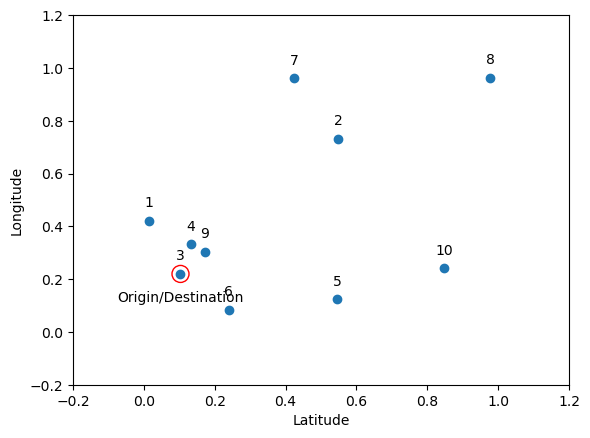

In [10]:
plot_origin_desitination(cities, origin_city, destination_city)

In [11]:
# Calculate total distance of a path
def calculate_total_distance(path, distance_matrix):
    total_distance = np.sum([distance_matrix[path[i]-1,path[i+1]-1] for i in range(len(path)-1)])
    return total_distance

In [12]:
# Simulated annealing
def simulated_annealing(cities, origin_city, destination_city, initial_temperature, cooling_rate, num_iterations):
    num_cities = len(cities)
    if origin_city != destination_city:
        current_path = np.zeros(num_cities, dtype=int)
        current_path[0] = origin_city
        current_path[-1] = destination_city
        rest_cities = list(range(1,num_cities+1))
        rest_cities.remove(origin_city)
        rest_cities.remove(destination_city)
        current_path[1:-1] = np.random.permutation(rest_cities)
    else:
        current_path = np.zeros(num_cities+1, dtype=int)
        current_path[0] = origin_city
        current_path[-1] = destination_city
        rest_cities = list(range(1,num_cities+1))
        rest_cities.remove(origin_city)
        current_path[1:-1] = np.random.permutation(rest_cities)

    distance_matrix = calculate_distance_matrix(cities)
    current_distance = calculate_total_distance(current_path, distance_matrix)
    
    best_path = current_path.copy()
    best_distance = current_distance
    current_distances = []
    
    for iteration in range(num_iterations):
        temperature = initial_temperature * np.exp(-cooling_rate * iteration)
        
        new_path = current_path.copy()
        i, j = random.sample(range(1, len(current_path)-1), 2)
        new_path[i], new_path[j] = new_path[j], new_path[i]
        new_distance = calculate_total_distance(new_path, distance_matrix)
        
        if new_distance < current_distance:
            current_path = new_path
            current_distance = new_distance
            if new_distance < best_distance:
                best_path = new_path
                best_distance = new_distance
        else:
            probability = np.exp(-(new_distance - current_distance) / temperature)
            if random.random() < probability:
                current_path = new_path
                current_distance = new_distance
                
        current_distances.append(current_distance)
    
    return best_path, best_distance, current_distances

In [13]:
# Set parameters for simulated annealing
initial_temperature = 1000.0
cooling_rate = 0.002
num_iterations = 10000

best_path, best_distance, current_distances = simulated_annealing(cities, origin_city, destination_city, initial_temperature, cooling_rate, num_iterations)

Text(0, 0.5, 'Distance')

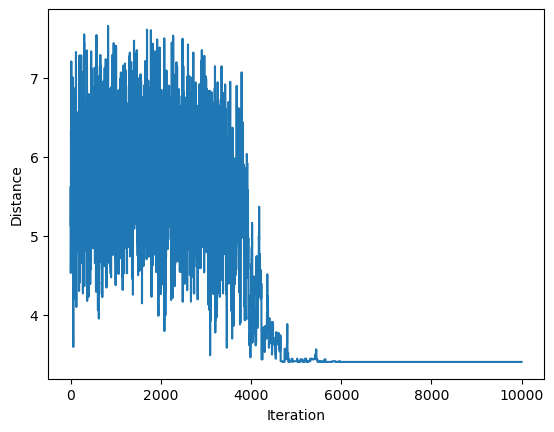

In [14]:
plt.plot(range(num_iterations), current_distances)
plt.xlabel("Iteration")
plt.ylabel("Distance")

In [15]:
# Print the results
print("Best path:", best_path)
print("Shortest path length:", best_distance)

Best path: [ 3  4  9  6  5 10  8  2  7  1  3]
Shortest path length: 3.4034505007638876


In [16]:
# Plot the best path
def plot_best_path(cities, origin_city, destination_city, best_path):
    plt.scatter(cities[:,0], cities[:,1])
    for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
        plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
    if origin_city != destination_city:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
        plt.scatter(cities[destination_city-1,0], cities[destination_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Destination", (cities[destination_city-1,0], cities[destination_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin/Destination", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    for i in range(len(best_path)-1):
        plt.plot([cities[best_path[i]-1,0], cities[best_path[i+1]-1,0]], [cities[best_path[i]-1,1], cities[best_path[i+1]-1,1]], color='r')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

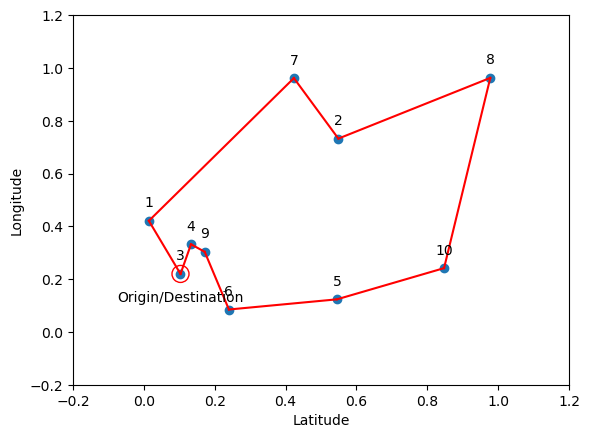

In [17]:
plot_best_path(cities, origin_city, destination_city, best_path)

In [18]:
temperatures = []
for iteration in range(num_iterations):
    temperature = initial_temperature * np.exp(-cooling_rate * iteration)
    temperatures.append(temperature)

Text(0, 0.5, 'Temperature')

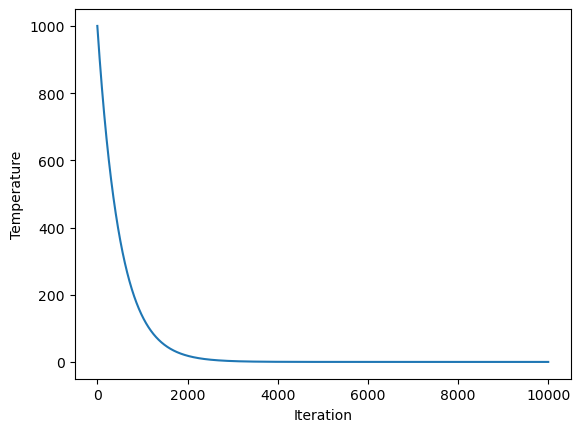

In [19]:
plt.plot(range(num_iterations), temperatures)
plt.xlabel("Iteration")
plt.ylabel("Temperature")

In [20]:
probabilities = []
new_distance = 2.1
current_distance = 2
for temperature in temperatures:
    probability = np.exp(-(new_distance - current_distance) / temperature)
    probabilities.append(probability)

Text(0, 0.5, 'Probability')

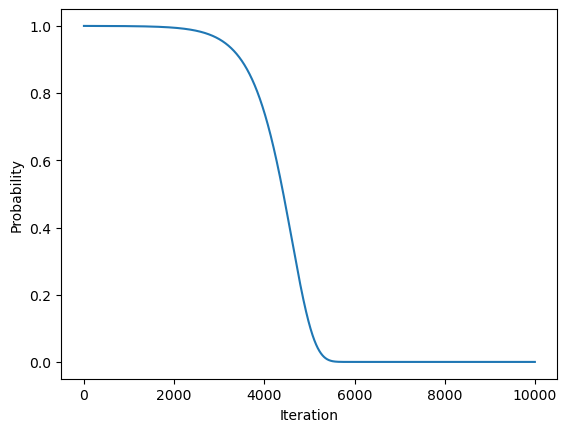

In [21]:
plt.plot(range(num_iterations), probabilities)
plt.xlabel("Iteration")
plt.ylabel("Probability")